In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [2]:
datasig=pd.read_csv("sig_had_values.csv")
databkg=pd.read_csv("bkg_had_values.csv")

In [3]:
datasig.shape

(4646, 25)

In [4]:
databkg.shape

(5282, 25)

In [5]:
datasig["label"]=1
databkg["label"]=0

In [6]:
data2=datasig.append(databkg,ignore_index=True)

In [7]:
data2.shape


(9928, 26)

In [8]:
data2.head()

,JetPt1,JetEta1,JetPhi1,JetMass1,JetBTagger1,JetPt2,JetEta2,JetPhi2,JetMass2,JetBTagger2,...,JetEta4,JetPhi4,JetMass4,JetBTagger4,ZZPt,ZZPhi,ZZEta,ZZMass,weight,label
0,167.150,-0.776438,1.440750,25.8188,0.179759,70.7794,-0.154553,0.350386,14.0573,0.975653,...,-0.483385,2.91395,3.70648,0.010560,219.4010,-1.789890,-1.116720,126.792,0.000056,1
1,133.301,-0.884264,-0.267022,19.3262,0.014708,113.6030,-0.802912,-1.724960,19.7239,0.973898,...,-1.717180,2.89912,10.40980,0.033225,249.7370,0.916814,-0.739110,127.321,0.000072,1
2,173.966,-0.646671,-2.781010,17.7597,0.213439,113.9620,-0.347223,1.699790,21.0720,0.446442,...,-0.093808,-2.43640,10.95780,0.023086,217.2710,-0.333024,0.374378,123.908,0.000042,1
3,123.883,0.599243,-1.795990,15.0571,0.992366,119.9060,-0.912783,1.646610,23.6522,0.079898,...,-0.907467,1.07840,9.10459,0.237895,11.0847,0.406864,2.851050,135.255,0.000047,1
4,131.413,-1.466730,-2.230160,17.1440,0.974358,82.7551,-1.334420,2.084190,10.2249,0.088999,...,-0.760526,0.73594,9.12132,0.029613,94.3562,1.316190,-1.236170,124.261,0.000022,1


In [9]:
X=data2.iloc[:,:-2]
Y=data2.iloc[:,-1]
weights=data2.iloc[:,-2]

In [10]:
X_train, X_test, y_train, y_test,weight_train,weight_test = train_test_split(X, Y,weights, test_size=0.3, random_state=7)

In [11]:
X_train=np.asarray(X_train).astype('float32')
X_test=np.asarray(X_test).astype('float32')
y_train=np.asarray(y_train).astype('float32')
y_test=np.asarray(y_test).astype('float32')
weight_train=weight_train*10**5
weight_test=weight_test*10**5
weight_test=np.asarray(weight_test).astype("float32")
weight_train=np.asarray(weight_train).astype("float32")


In [12]:
weight_train

array([6.4645 , 7.72622, 8.03254, ..., 8.162  , 7.35243, 6.1632 ],
      dtype=float32)

In [13]:
ndim=X.shape[1]

In [14]:
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(ndim,)))
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train, epochs=40,batch_size=512,validation_data=(X_test, y_test,weight_test),sample_weight=weight_train)

Instructions for updating:
Use tf.cast instead.
Train on 6949 samples, validate on 2979 samples
Epoch 1/40
6949/6949 [==============================] - 0s 32us/step - loss: 28.7970 - acc: 0.4378 - val_loss: 12.7654 - val_acc: 0.4354
Epoch 2/40
6949/6949 [==============================] - 0s 2us/step - loss: 9.8738 - acc: 0.4822 - val_loss: 7.7158 - val_acc: 0.5166
Epoch 3/40
6949/6949 [==============================] - 0s 2us/step - loss: 6.8466 - acc: 0.5371 - val_loss: 6.0616 - val_acc: 0.5626
Epoch 4/40
6949/6949 [==============================] - 0s 2us/step - loss: 5.5859 - acc: 0.5582 - val_loss: 5.0996 - val_acc: 0.5676
Epoch 5/40
6949/6949 [==============================] - 0s 3us/step - loss: 4.8560 - acc: 0.5632 - val_loss: 4.5603 - val_acc: 0.5744
Epoch 6/40
6949/6949 [==============================] - 0s 2us/step - loss: 4.3831 - acc: 0.5699 - val_loss: 4.1413 - val_acc: 0.5841
Epoch 7/40
6949/6949 [==============================] - 0s 2us/step - loss: 4.1075 - acc: 0.5720 

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

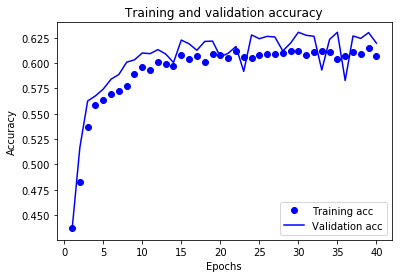

In [20]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
results = model.evaluate(X_test, y_test,sample_weight=weight_test)
results

2979/2979 [==============================] - 0s 8us/step


[3.639785946595985, 0.6196710305671718]

In [22]:
probs=model.predict(X_test)

In [23]:
from sklearn.metrics import roc_curve
y_pred_keras= model.predict_proba(X_test)
# keep probabilities for the positive outcome only
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras,sample_weight=weight_test)

In [24]:
y_pred_keras[10:30]

array([[0.38731933],
       [0.56112176],
       [0.7045554 ],
       [0.5796436 ],
       [0.38893336],
       [0.5163108 ],
       [0.75202477],
       [0.60328156],
       [0.3551978 ],
       [0.38977748],
       [0.412056  ],
       [0.22186047],
       [0.42796358],
       [0.31700993],
       [0.6818316 ],
       [0.4157725 ],
       [0.4339774 ],
       [0.72419465],
       [0.38016775],
       [0.60495937]], dtype=float32)

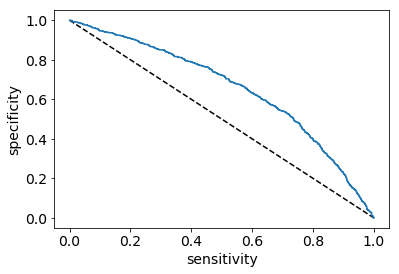

In [25]:
plt.figure(2)
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(tpr_keras, 1-fpr_keras, label='Keras:DNN')
plt.xlabel("sensitivity",fontsize=14)
plt.ylabel("specificity",fontsize=14)
plt.tick_params(axis="both",labelsize=14)
plt.show()

In [26]:
for kk in range(tpr_keras.size):
    if(round(tpr_keras[kk],3)==0.400):
        spe=1-fpr_keras[kk]
        print(spe)

0.7891277131086105
0.7886166152308708
0.7886166152308708


In [27]:
filename="DNN_had.CSV"
with open(filename,"w") as file:
    for kk in range(tpr_keras.size):
        file.write(str(fpr_keras[kk]))
        file.write(" ")
        file.write(str(tpr_keras[kk]))
        file.write("\n")

In [28]:
sig_probs=[]
bkg_probs=[]
sig_weight=[]
bkg_weight=[]
for index in range(y_test.shape[0]):
    if(y_test[index]==1.0):
        sig_probs.append(probs[index][0])
        sig_weight.append(weight_test[index])
    else:
        bkg_probs.append(probs[index][0])
        bkg_weight.append(weight_test[index])
    

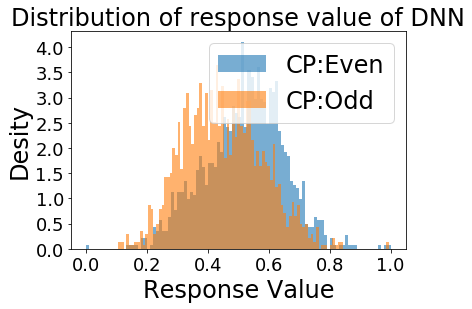

In [29]:
plt.figure(3)
plt.rcParams['figure.figsize'] = [12, 12]

plt.hist(sig_probs,bins=100,density=True,alpha=0.6,label="CP:Even");
plt.hist(bkg_probs,bins=100,density=True,alpha=0.6,label="CP:Odd");
plt.legend(loc='upper right',fontsize=24)
plt.xlabel("Response Value",fontsize=24)
plt.title("Distribution of response value of DNN",fontsize=24)
plt.ylabel("Desity",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('DNN_had_output.png')
plt.show()

In [30]:
sig_probs

[0.5992243,
 0.5638619,
 0.5733,
 0.58553255,
 0.56314844,
 0.53354424,
 0.37949622,
 0.38731933,
 0.56112176,
 0.7045554,
 0.38893336,
 0.5163108,
 0.75202477,
 0.60328156,
 0.3551978,
 0.38977748,
 0.412056,
 0.22186047,
 0.42796358,
 0.6818316,
 0.72419465,
 0.60495937,
 0.3009534,
 0.2279377,
 0.58611166,
 0.6297375,
 0.22935629,
 0.71675825,
 0.55613285,
 0.5607754,
 0.28090423,
 0.6019678,
 0.59632564,
 0.77698314,
 0.5368527,
 0.48212612,
 0.59947765,
 0.5177137,
 0.7362663,
 0.6445687,
 0.6754674,
 0.7733941,
 0.38177028,
 0.610992,
 0.58450073,
 0.6147792,
 0.48335093,
 0.5768327,
 0.6055784,
 0.0006047785,
 0.21751711,
 0.5876024,
 0.28065643,
 0.57756764,
 0.5655056,
 0.74817395,
 0.7600842,
 0.60477644,
 0.4967092,
 0.529879,
 0.5130935,
 0.3224829,
 0.67353964,
 0.51625896,
 0.46498582,
 0.69123864,
 0.450828,
 0.29946014,
 0.60315144,
 0.37599027,
 0.50395125,
 0.6009976,
 0.6329552,
 0.47924778,
 0.55275416,
 0.5179168,
 0.47567967,
 0.61569864,
 0.70379853,
 0.54341024,

In [31]:
len(sig_probs)

1412

In [32]:
#write the response value as histogram into root file
from ROOT import TFile, TH1F
file=TFile("DNN_had_hist.root","RECREATE")
h1=TH1F("sig","histo of signal",100,0,1)
h2=TH1F("bkg","histo of background",100,0,1)
for kk in range(len(sig_probs)):
    h1.Fill(sig_probs[kk],sig_weight[kk])
for kk in range(len(bkg_probs)):
    h2.Fill(bkg_probs[kk],bkg_weight[kk])
inte1=h2.Integral("width")
scale1=1/h1.Integral("width")
scale2=1/h2.Integral("width")
h1.Scale(scale1)
h2.Scale(scale2)
file.Write();
#By default the integral is computed as the sum of bin contents in the range. 
#if option "width" is specified, the integral is the sum of the bin contents multiplied by the bin width in x.



ModuleNotFoundError: No module named 'ROOT'